https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/

### README
This is a notebook intended for studying a paper 'Interactive color image segmantation with linear programming' by Hongdong Li et al.

### Summary

Image Segmentation
Describes a linear programming approach for segmenting a color image into multiple regions, leading to lower computational complexity. Convex optimization.
Inspired by semi-definite programming (SDP) algorithm but better.

Interactive image segmentation.

This paper uses color. (extent to texture is suggested)

How is it compared to Graph cut? It said method mentioned in the paper is more flexible? Not sure what flexibility is.

We need scribbles as prior knwoledge, our method is an instance of semi-supervised learning or transductive learning.

### About the formula
Color image segmentation is usually based on certain optimization criterion, according to the color measurement, and the spatial continuity of neighboring pixel's labels.

In the work, these two properties are captured by a two-term MRF(Markov Random Field) energy which serves as the objective function to be optimized (minimized).

$$ E(I) = \sum_i C_i(I_i) + \sum_{<i,j>} V_{ij}(I_i, I_j) $$

$C_i(I_i)$ probably captures one of the properties of color.

We want to develop a globally optimal full-resolution all-pixel-wise color image segmentation algorithm.

Data-term: sums over all pixels, capturing color consistency

Separation-term: sums over all pairwise neighborhood term, describing the MRf neighborhood dependency.

We convert the RGB color image into the CIE-Lab space in that it is more close to human's color perception.

compute associate feature vector for each pixel.

$I_i$ : notation for feature vector. In this paper, it would mean color value at pixel i.

This feature vector is used to characterize local properties of the pixel. e.g., intensity, chromaticity, and texture

However, for simplicity, we directly use the color values of the central pixel under consideration and of its 4-neighboring pixels. It forms 15-dimensional feature vector.



$ x_{ia} =1 $ if pixel i belongs to class a 

With the introduction to notation indicating vector $x_i$, we can transform the equation into,

$$ E(I) = \sum_{i}^{MN} \sum_{a}^{k} C_i(a)x_{ia} + \sum_{<i,j>} \sum_{a=1}^k \sum_{b=1}^k V_{ij}(a,b)x_{ia}x_{jb} $$

Our observation is that under mild condition, we can replace the second term in Eq2 which is quadratic with a linear term.

$$ E(I) = \sum_{i=1}^{MN} \sum_{a=1}^{k} C_i(a)x_{ia} + \sum_{<i,j>} \sum_{a=1}^k w_{ij} |x_{ia} - x_{ja}| $$

We assume that we have already k prototype color featur vectors to represent each the pixel-class.

$$ E(I) = \sum_{i=1}^{MN} \sum_{a=1}^{k} (I_i - μ_a)x_{ia} + \sum_{<i,j>} \sum_{a=1}^k w_{ij} |x_{ia} - x_{ja}| $$

In [4]:
from skimage import color # for CIELab conversion
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(184, 275, 3)


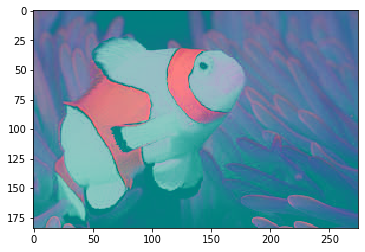

In [6]:
image = plt.imread('nemo0.jpg')
print(image.shape)
# plt.imshow(image)
cie_img = color.rgb2lab(image)
plt.imshow(((cie_img + [0, 128, 128]) / [100, 255, 255]))

For simplicity, we are only going to care about segmentation where `k=2`; two class segmentation problem.<br>


In [ ]:

md_py = cdist(y,numpy.reshape(numpy.mean(x, axis=0), (1, -1)),'mahalanobis',cov_x_inv)